# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Mumtaaz Abdurrahman]
- **Email:** [mumtaaz210@gmail.com]
- **ID Dicoding:** [Mumtaaz abdurrahman]

## Menentukan Pertanyaan Bisnis

- Kapan waktu paling sibuk dalam penyewaan sepeda ?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset day.csv dan hour.csv
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [3]:
# Tampilkan 5 baris pertama dari day dataset
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Tampilkan 5 baris pertama dari hour dataset
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membaca dua file dataset yaitu day.csv dan hour.csv
- Menampilkan 5 baris pertama setiap data set untuk melihat struktur awal dataset.

### Assessing Data

#### Menilai data `day_data`

In [5]:
# Cek informasi dataset
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Memeriksa jumlah data yang hilang
day_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
# Memeriksa jumlah data yang duplicated
day_data.duplicated().sum()

0

#### Menilai data `hour_data`

In [8]:
# Cek informasi dataset
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# Memeriksa jumlah data yang hilang
hour_data.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
# Memeriksa jumlah data yang duplicated
hour_data.duplicated().sum()

0

**Insight:**
- Mengecek informasi dataset
- Beberapa kolom memiliki tipe data yang perlu disesuaikan
- Tidak ada data yang hilang
- Tidak ada data yang duplicated

### Cleaning Data

In [11]:
# Mengonversi kolom 'dteday' menjadi datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Hapus kolom yang tidak diperlukan ('instant' karena hanya indeks unik)
day_data.drop(columns=['instant'], inplace=True)
hour_data.drop(columns=['instant'], inplace=True)

**Insight:**
- Mengubah format dteday ke format datetime untuk memudahkan analisis waktu.
- Menghapus kolom yang tidak diperlukan untuk menyederhanakan dataset.

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Statistik deskriptif dataset day
day_data.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
# Statistik deskriptif dataset hour
hour_data.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Jumlah Distribusi Penyewaan Sepeda harian

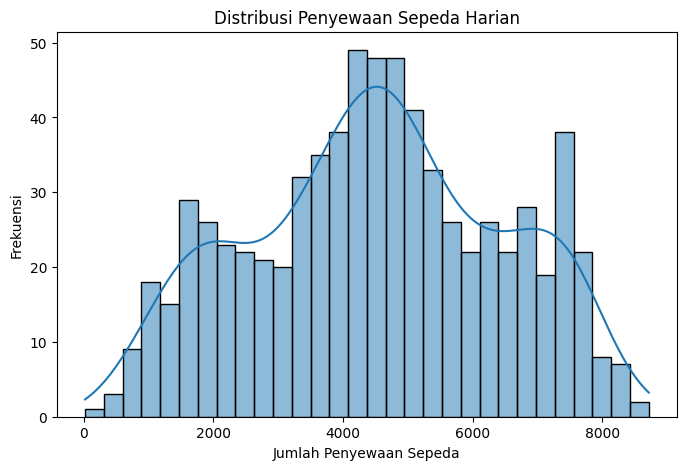

In [14]:
# Histogram jumlah distribusi penyewaan sepeda harian
plt.figure(figsize=(8,5))
sns.histplot(day_data['cnt'], bins=30, kde=True)
plt.title("Distribusi Penyewaan Sepeda Harian")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.show()

Frekuensi Penyewaan Sepeda Berdasarkan Musim

<ipython-input-15-fcdc5894fdec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=day_data, x='season', palette="viridis")


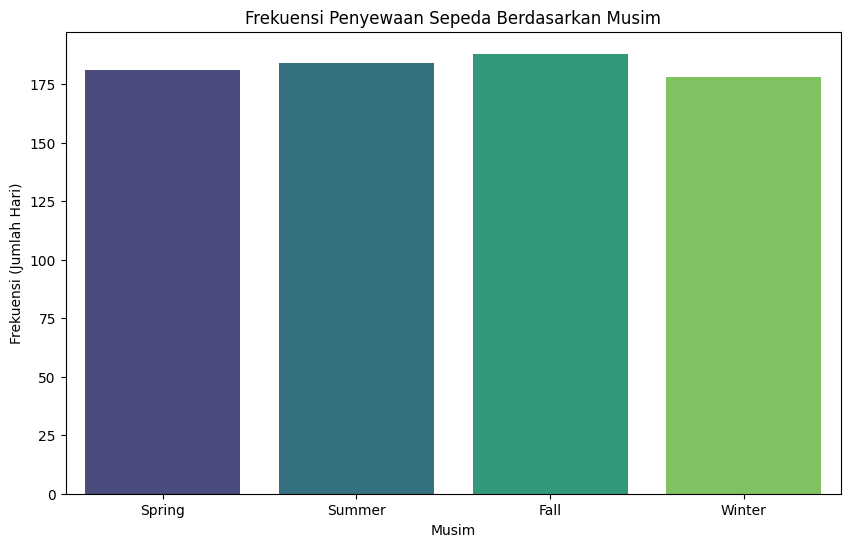

In [15]:
# bar plot untuk frekuensi penyewaan sepeda berdasakan musim
plt.figure(figsize=(10,6))
sns.countplot(data=day_data, x='season', palette="viridis")
plt.title("Frekuensi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Frekuensi (Jumlah Hari)")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()


Frekuensi Penyewaan Sepeda Berdasarkan Musim & Hari Kerja

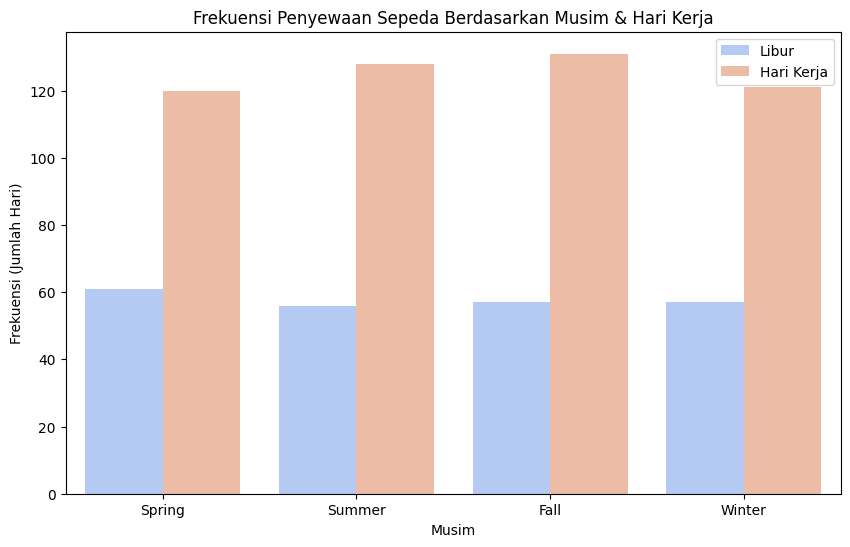

In [16]:
# bar plot frekuensi penyewaan sepeda berdasarkan musim & hari kerja
plt.figure(figsize=(10,6))
sns.countplot(data=day_data, x='season', hue='workingday', palette="coolwarm")
plt.title("Frekuensi Penyewaan Sepeda Berdasarkan Musim & Hari Kerja")
plt.xlabel("Musim")
plt.ylabel("Frekuensi (Jumlah Hari)")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.legend(["Libur", "Hari Kerja"])
plt.show()

**Insight:**
- Musim mempengaruhi pola penyewaan sepeda, dengan puncaknya di musim gugur dan terendah di musim dingin.
- Hari kerja memiliki penyewaan lebih tinggi dibanding hari libur karena banyak orang menggunakan sepeda untuk bekerja atau sekolah.
- Distribusi penyewaan sepeda tidak merata, ada hari dengan peminjaman sangat tinggi dan ada juga yang sangat rendah.
- Faktor cuaca dan kondisi jalan kemungkinan besar memengaruhi pola penyewaan sepanjang tahun.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

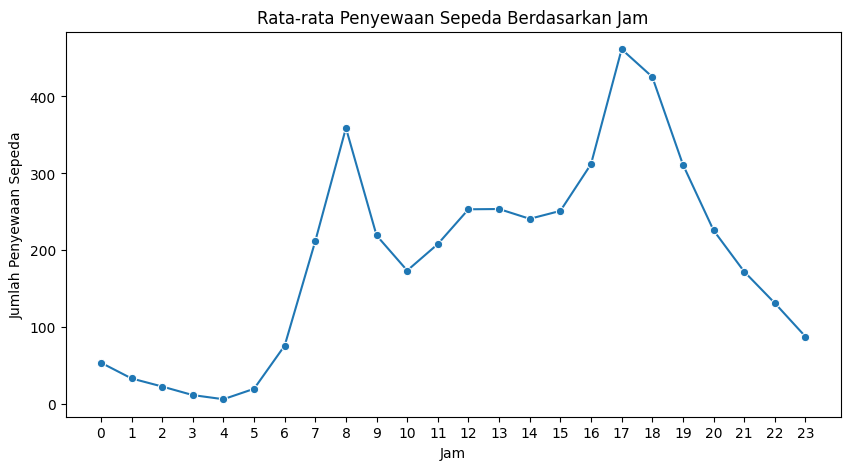

In [17]:
# Kapan Waktu Paling Sibuk dalam Penyewaan Sepeda?

# Kelompokkan jumlah penyewaan berdasarkan jam (hour.csv)
hourly_rentals = hour_data.groupby("hr")["cnt"].mean()

# Visualisasi tren penyewaan berdasarkan jam
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker="o")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(range(0,24))
plt.show()

### Pertanyaan 2:

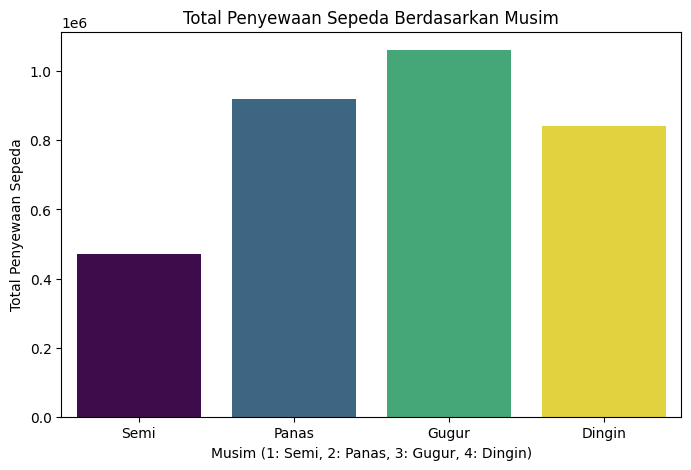

In [25]:
# Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda ?

# Kelompokkan total penyewaan berdasarkan musim
seasonal_rentals = day_data.groupby("season")["cnt"].sum().reset_index()

# Visualisasi total penyewaan berdasarkan musim
plt.figure(figsize=(8,5))
sns.barplot(data=seasonal_rentals, x="season", y="cnt", hue="season", palette="viridis", legend=False)
plt.title("Total Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Semi", "Panas", "Gugur", "Dingin"])
plt.show()


**Insight:**

Pertanyaan 1 :

Dari grafik yang ditampilkan, berikut adalah beberapa insight utama yang dapat diperoleh:

- Puncak penyewaan terjadi pada pukul 08:00 dan 17:00-18:00

  - Puncak pertama terjadi sekitar pukul 08:00 dengan jumlah penyewaan mencapai lebih dari 350 unit. Hal ini kemungkinan besar karena jam berangkat kerja atau sekolah, di mana banyak orang menggunakan sepeda sebagai alat transportasi.
  - Puncak kedua terjadi pada pukul 17:00-18:00, dengan jumlah penyewaan mencapai lebih dari 450 unit. Ini bisa dikaitkan dengan jam pulang kerja atau sekolah, ketika orang kembali menggunakan sepeda untuk perjalanan pulang.

  Rekomendasi:
  - Meningkatkan jumlah sepeda yang tersedia di lokasi-lokasi strategis (stasiun, perkantoran, sekolah) menjelang jam sibuk ini untuk menghindari kekurangan unit.
  - Mengoptimalkan sistem pemeliharaan dan distribusi sepeda agar selalu tersedia di titik-titik dengan permintaan tinggi.

- Penyewaan paling rendah terjadi antara pukul 00:00 - 05:00

  - Pada rentang waktu ini, jumlah penyewaan sangat rendah, hanya sekitar 0-50 unit per jam. Hal ini wajar karena sebagian besar orang sedang beristirahat.

  Rekomendasi:

  - Mengurangi jumlah sepeda yang tersedia di jam-jam ini untuk menghemat biaya operasional.
  - Bisa dipertimbangkan layanan penyewaan malam dengan tarif lebih murah untuk menarik pelanggan yang bekerja malam atau beraktivitas di waktu tersebut.

Pertanyaan 2 :

Dari hasil visualisasi, berikut adalah beberapa insight utama yang dapat diperoleh:

- Musim gugur memiliki jumlah penyewaan tertinggi

  - Terlihat bahwa jumlah penyewaan sepeda mencapai lebih dari 1.000.000 unit pada musim gugur.

  - Hal ini bisa disebabkan oleh cuaca yang relatif nyaman dan stabil, sehingga banyak orang memilih bersepeda untuk rekreasi maupun transportasi.

  Rekomendasi:
  - Menyediakan lebih banyak sepeda selama musim gugur untuk mengantisipasi lonjakan permintaan.
  - Mengadakan promo atau diskon untuk menarik pelanggan baru, terutama saat akhir pekan.

- Penyewaan sepeda terendah terjadi pada musim semi

  - Jumlah penyewaan pada musim semi hanya sekitar 450.000 unit, yang merupakan yang paling rendah dibanding musim lainnya.

  - Kemungkinan faktor cuaca seperti hujan atau angin kencang menyebabkan berkurangnya minat pengguna untuk bersepeda.

  Rekomendasi:
  
  - Menyediakan fasilitas tambahan seperti jaket tahan angin atau jas hujan untuk pelanggan yang tetap ingin bersepeda.

  - Menawarkan harga sewa yang lebih murah atau paket langganan khusus di musim semi untuk menarik lebih banyak pengguna.

## Analisis Lanjutan (Opsional)

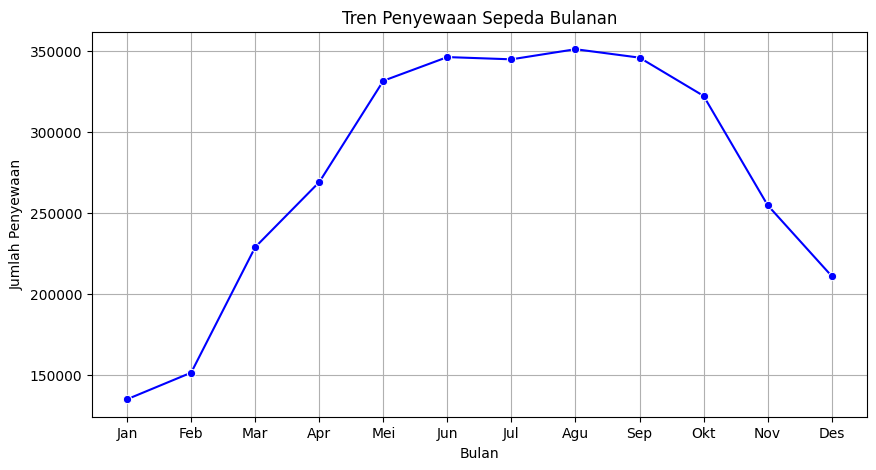

In [19]:
# Tren Penyewaan Sepeda Bulanan

# Agregasi data per bulan
monthly_trend = day_data.groupby("mnth")["cnt"].sum().reset_index()

# Visualisasi tren bulanan
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trend, x="mnth", y="cnt", marker="o", color="b")
plt.title("Tren Penyewaan Sepeda Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.grid()
plt.show()

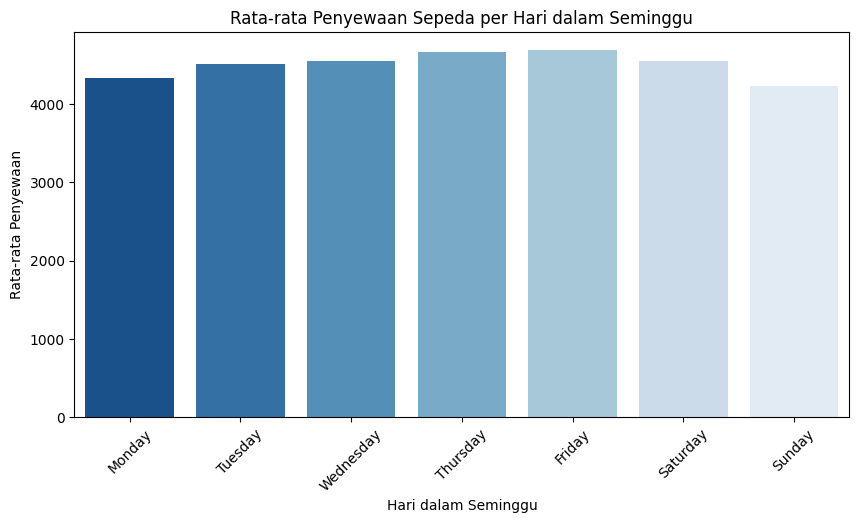

In [20]:
# Agregasi rata-rata jumlah penyewaan per hari dalam seminggu
weekly_trend = day_data.groupby(day_data["dteday"].dt.day_name())["cnt"].mean().reset_index()

# Urutkan sesuai hari dalam seminggu
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_trend["dteday"] = pd.Categorical(weekly_trend["dteday"], categories=order, ordered=True)
weekly_trend = weekly_trend.sort_values("dteday")

# Visualisasi yang sudah diperbaiki
plt.figure(figsize=(10,5))
sns.barplot(data=weekly_trend, x="dteday", y="cnt", hue="dteday", palette="Blues_r", legend=False)  # ✅ FIXED

plt.title("Rata-rata Penyewaan Sepeda per Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Penyewaan sepeda cenderung meningkat pada bulan-bulan musim panas (Juni Agustus).
- Penurunan terlihat di musim dingin (Desember - Februari).
- Jumlah penyewaan sepeda lebih tinggi pada Sabtu dan Minggu, menunjukkan bahwa sepeda lebih banyak digunakan untuk aktivitas rekreasi.
- Rata-rata penyewaan sepeda paling rendah terjadi pada hari Senin, kemungkinan karena orang masih beradaptasi setelah akhir pekan.

In [21]:
# Menambahkan kolom sumber data agar bisa dibedakan
day_data["source"] = "daily"
hour_data["source"] = "hourly"

# Menggabungkan kedua dataset
main_data = pd.concat([day_data, hour_data])

# Menyimpan ke dalam satu file CSV
main_data.to_csv("main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1, Waktu paling sibuk dalam penyewaan sepeda paling ramai saat jam berangkat kerja (07:00 - 09:00) dan jam pulang kerja (17:00 - 19:00). Penyewaan lebih sepi pada malam hari setelah pukul 22:00.
- Conclution pertanyaan 2, Pengaruh musim terhadap penyewaan menjadikan penyewaan sepeda meningkat di musim panas dan menurun di musim dingin.
Faktor cuaca sangat mempengaruhi kebiasaan pengguna dalam menyewa sepeda.